# K-means 실습
1. 필요 라이브러리 import
  - numpy
  - matplotlib
  - sklearn에 존재하는 KMeans 라이브러리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## 데이터 생성
- 2차원 공간에서 3개의 군집을 가지는 데이터 생성

In [2]:
np.random.seed(0)

# 클러스터 1
x1 = np.random.normal(0, 1, (30, 2))

# 클러스터 2
x2 = np.random.normal(5, 1, (30, 2))

# 클러스터 3
x3 = np.random.normal(10, 1, (30, 2))

# 데이터 병합
X = np.vstack((x1, x2, x3))
print(X.shape)


(90, 2)


## 생성된 데이터 시각화

<ipython-input-3-873b21fdf7de>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


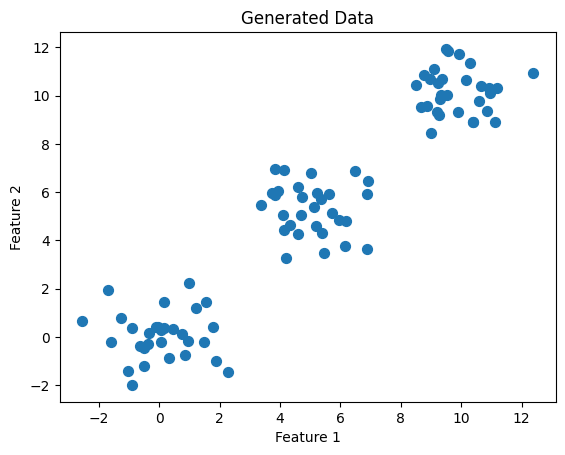

In [3]:
# 시각화
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## K-means clustering 수행
- 군집의 개수 즉 K=3으로 설정
- fit을 통해 데이터 X를 학습
- centers는 군집의 중심 좌표를 저장
- labels는 k-means로 군집화된 라벨링 데이터 저장

In [4]:
# 모델 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [5]:
# 클러스터 중심
centers = kmeans.cluster_centers_

In [6]:
# 각 데이터 포인트의 클러스터 할당
labels = kmeans.labels_

In [7]:
print(centers)
print(labels)

[[ 0.08006113  0.07327346]
 [ 9.86351869 10.16570271]
 [ 5.05623336  5.32087903]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## K-means 클러스터링의 데이터 시각화

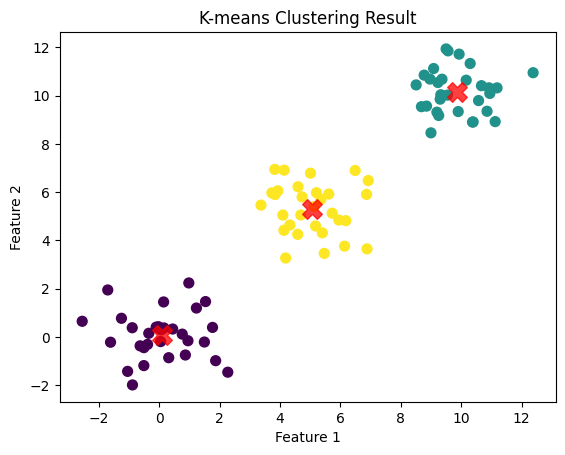

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Iris 붓꽃 분류

## Iris 데이터셋 설명
이 데이터는 세 가지 서로 다른 종류의 아이리스 꽃(Species)의 측정된 특성을 포함하고 있으며, 이를 통해 각 꽃의 종류를 분류하는 문제를 다룸.

주요 특징:
  - 샘플 수: 150개
  - 특징 수: 4개
  - 클래스 수: 3개 (각각 50개 샘플)

각 샘플에 포함된 4개의 특성:
  - Sepal Length: 꽃받침의 길이 (cm)
  - Sepal Width: 꽃받침의 너비 (cm)
  - Petal Length: 꽃잎의 길이 (cm)
  - Petal Width: 꽃잎의 너비 (cm)

클래스 (종):
  - Setosa: Iris-setosa
  - Versicolor: Iris-versicolor
  - Virginica: Iris-virginica

데이터셋의 구조:
  - 데이터: 4개의 특성으로 이루어진 150개의 샘플
  - 라벨: 3개의 클래스 (각각 0, 1, 2로 표시됨)

## 1.필요 라이브러리 임포트

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns

## 2.데이터 로드

In [10]:
# 데이터 로드
iris = load_iris()
X = iris.data[:, 2:4]  # 시각화를 위한 첫 번째와 두 번째 피처만 선택

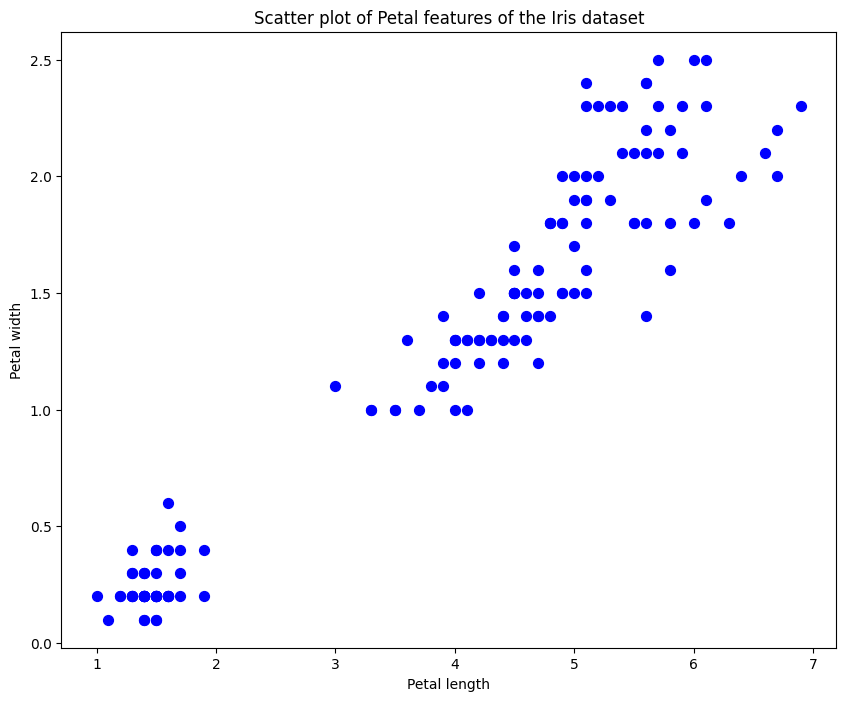

In [11]:
# 산점도 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50)
plt.title("Scatter plot of Petal features of the Iris dataset")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

## 3.모델 학습

In [12]:
# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=10)

In [13]:
# 클러스터 중심
centers = kmeans.cluster_centers_
print(centers)

[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


In [14]:
# 각 데이터 포인트의 클러스터 할당
labels = kmeans.labels_

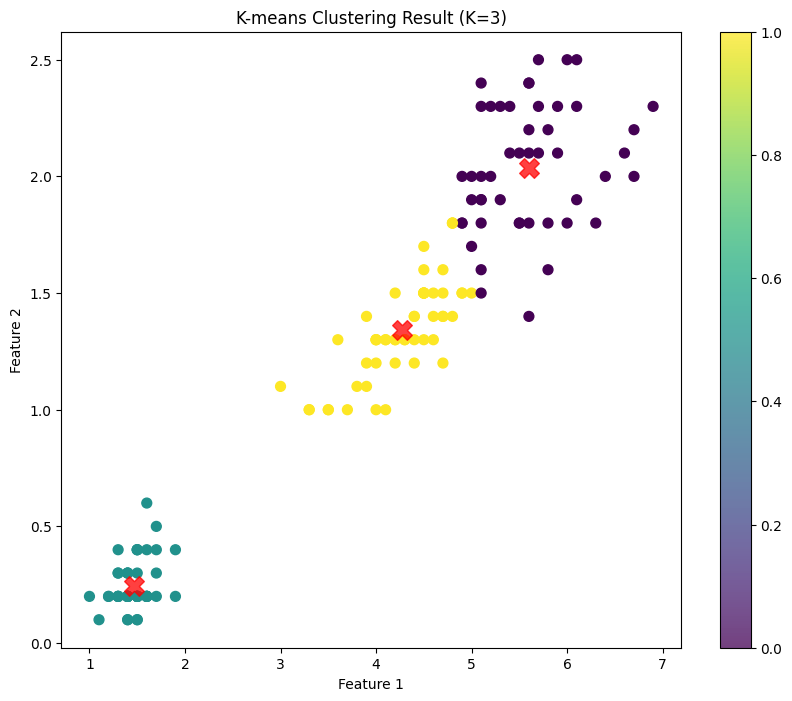

In [15]:
# 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering Result (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()

- 스케일링 후에는 값의 범위가 고르게 분포

## 4.최적화

### 1.Elbow 최적화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

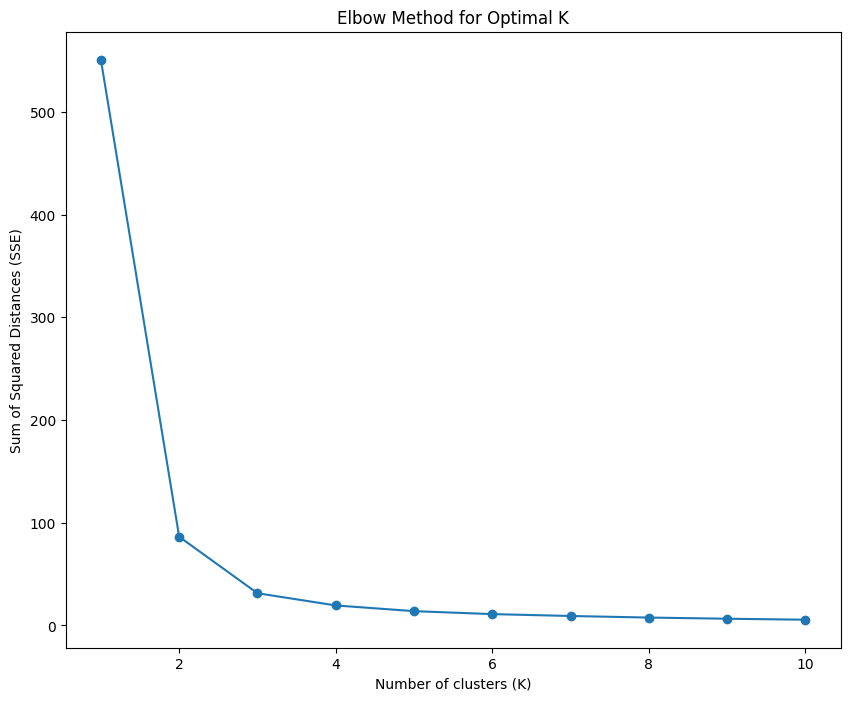

In [16]:
# 엘보우 방법을 위한 SSE (Sum of Squared Distances) 계산
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of Squared Distances (SSE)")
plt.show()


### 2.silhouette 최적화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

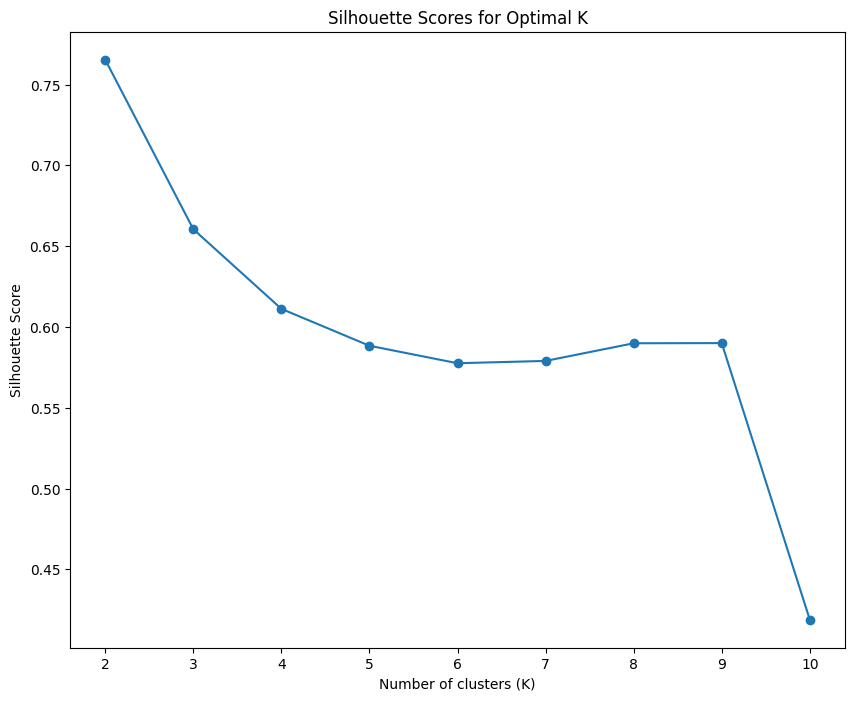

In [17]:
# 실루엣 점수를 저장할 리스트
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


## 5.K 최적화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


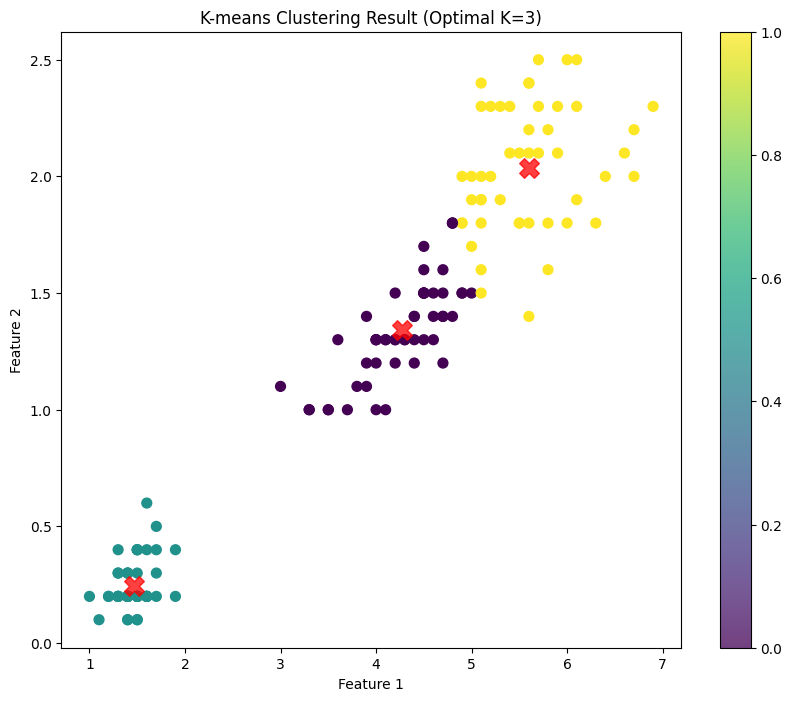

In [18]:
optimal_k = 3  # 엘보우 방법과 실루엣 점수에서 K=3이 최적임을 가정
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f"K-means Clustering Result (Optimal K={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


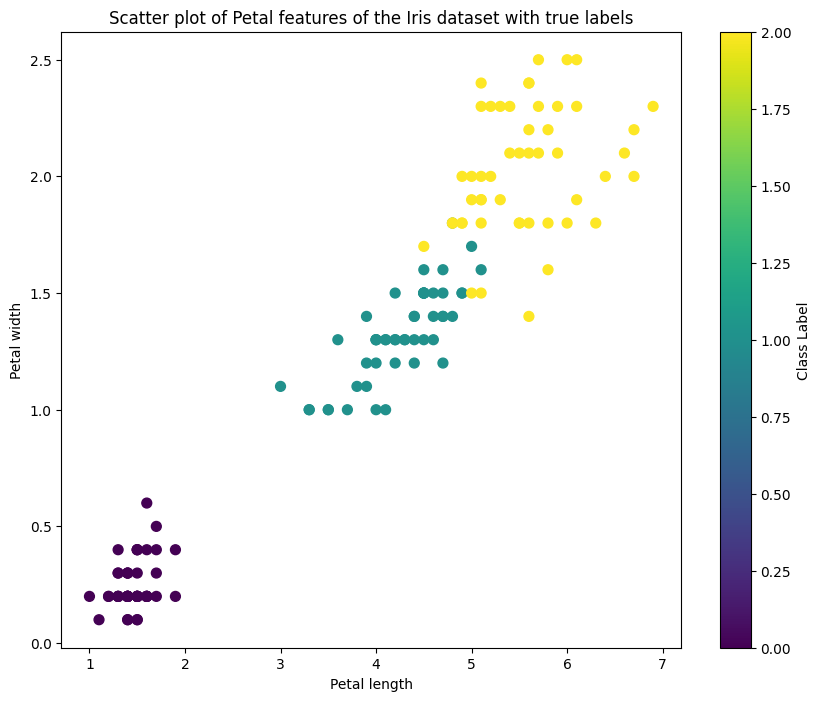

In [20]:
# 데이터 로드
y = iris.target  # 타겟 데이터 (클래스 레이블)

# 산점도 시각화 (타겟 클래스에 따라 색상 구분)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Scatter plot of Petal features of the Iris dataset with true labels")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.colorbar(label='Class Label')
plt.show()
